<a id="t1."></a>
# 1. Import Data & Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv file in a dataframe
df=pd.read_csv('Asteroid.csv')
df.head()

C:\Users\gayat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11,14,15,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [3]:
# to check the number of rows and columns in the dataset
df.shape

(839736, 27)

In [4]:
# to check out the  information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
full_name         839736 non-null object
a                 839734 non-null float64
e                 839736 non-null float64
G                 119 non-null float64
i                 839736 non-null float64
om                839736 non-null float64
w                 839736 non-null float64
q                 839736 non-null float64
ad                839730 non-null float64
per_y             839735 non-null float64
data_arc          823947 non-null float64
condition_code    838743 non-null object
n_obs_used        839736 non-null int64
H                 837042 non-null float64
diameter          137681 non-null object
extent            18 non-null object
albedo            136452 non-null float64
rot_per           18796 non-null float64
GM                14 non-null float64
BV                1021 non-null float64
UB                979 non-null float64
IR                1 non-null f


# Data Preprocessing and EDA

In [5]:
# Checking the missing values in the dataset
df.isnull().sum()

full_name              0
a                      2
e                      0
G                 839617
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15789
condition_code       993
n_obs_used             0
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64

In [6]:
#transforming to numeric, setting errors to NaN
df['diameter']= pd.to_numeric(df['diameter'],errors='coerce') 

In [7]:
#rows with nan diameters to drop
dropindexes = df['diameter'][df['diameter'].isnull()].index 
df = df.drop(dropindexes, axis=0) 

In [8]:
df.shape

(137680, 27)

In [9]:
df.isnull().sum()

full_name              0
a                      0
e                      0
G                 137562
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             140
condition_code         0
n_obs_used             0
H                    751
diameter               0
extent            137665
albedo              1232
rot_per           126493
GM                137667
BV                136676
UB                136716
IR                137679
spec_B            136311
spec_T            136716
neo                    0
pha                    0
moid                   0
dtype: int64

<a id="t2.1."></a>
## 2.1. Dropping Features

In [10]:
#Dropping the features with high ratio of missing values and full_name(as it is not relevant)
df=df.drop(['full_name','G','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T'],axis=1)
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,0.0900,N,N,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,0.1010,N,N,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,0.2140,N,N,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,0.4228,N,N,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,0.2740,N,N,1.09589


In [11]:
df.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           140
condition_code       0
n_obs_used           0
H                  751
diameter             0
albedo            1232
neo                  0
pha                  0
moid                 0
dtype: int64

<a id="t2.2."></a>
## 2.2. data_arc - Missing Values

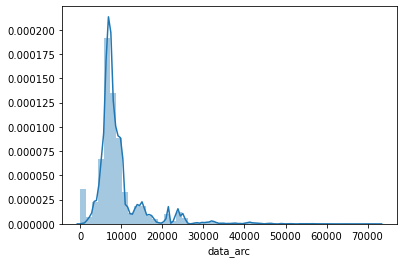

In [12]:
sns.distplot(df.data_arc.dropna())

In [13]:
#descrption about data_arc feature
print(df['data_arc'].describe())
print('\nThe maximum repeated value is : ',df['data_arc'].value_counts().index[0])

count    137540.000000
mean       8908.697681
std        6150.505469
min           1.000000
25%        6265.000000
50%        7492.000000
75%        9655.000000
max       72684.000000
Name: data_arc, dtype: float64

The maximum repeated value is :  1.0


In [14]:
#Since median is greater than mean, it is positively skewed. Hence, imputing with median.
df['data_arc'].fillna(df['data_arc'].median() , inplace = True) # median is the best option here 

<a id="t2.3."></a>
## 2.3. H - Missing Values

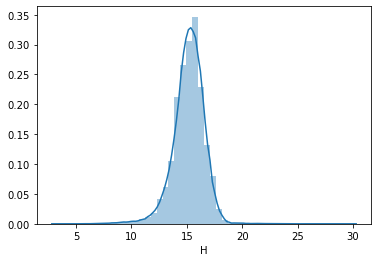

In [15]:
sns.distplot(df.H.dropna())

In [16]:
print(df['H'].describe())
print('\nThe maximum repeated value is : ',df['H'].value_counts().index[0])

count    136929.00000
mean         15.17739
std           1.40739
min           3.20000
25%          14.40000
50%          15.30000
75%          16.10000
max          29.90000
Name: H, dtype: float64

The maximum repeated value is :  15.2


In [17]:
# Since mean and median are close, imputing the missing values with mean.
df['H'].fillna(df['H'].mean() , inplace = True)

<a id="t2.4."></a>
## 2.4. Albedo - Missing Values

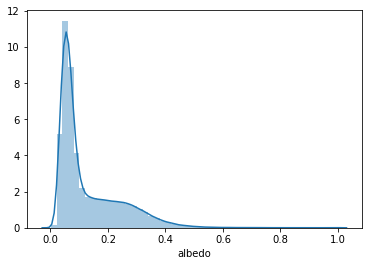

In [18]:
sns.distplot(df.albedo.dropna())

In [19]:
print(df['albedo'].describe())
print('\nThe maximum repeated value is : ',df['albedo'].value_counts().index[0])

count    136448.000000
mean          0.130050
std           0.109984
min           0.001000
25%           0.053000
50%           0.078000
75%           0.188000
max           1.000000
Name: albedo, dtype: float64

The maximum repeated value is :  0.057


In [20]:
#Since median is greater than mean, it is positively skewed. Hence, imputing with median.
df['albedo'].fillna(df['albedo'].median() , inplace = True)

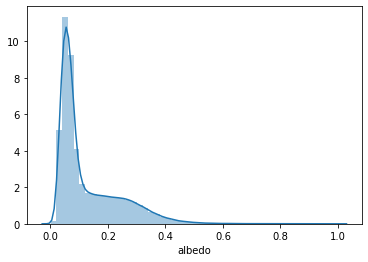

In [21]:
sns.distplot(df.albedo)

In [22]:
df.isnull().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
diameter          0
albedo            0
neo               0
pha               0
moid              0
dtype: int64

In [23]:
# To know the categries present in the categorical features.
list_of_cols = df.select_dtypes(['object'])
for col in list_of_cols:
    print(str(col) + ": "+ str(df[col].unique()))

condition_code: [0 1 3 2 '0' '1' '2' '3' '4' '5' '9' '7' 5.0 6.0 4.0 7.0 9.0 8.0 '8' '6']
neo: ['N' 'Y']
pha: ['N' 'Y']


#### Condition code is the orbit condition code which has the value between 0 and 9. As we can see from above, the values are in different formats.

In [24]:
df['condition_code'] = df['condition_code'].astype('int32')

In [25]:
df.condition_code.value_counts()

0    128209
9      6551
1      1372
2       397
5       334
7       207
6       188
4       177
3       168
8        77
Name: condition_code, dtype: int64

In [26]:
df.to_csv('asteroid_cleaned.csv') 

In [27]:
df=pd.read_csv('asteroid_cleaned.csv')
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,0.0900,N,N,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,0.1010,N,N,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,0.2140,N,N,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,0.4228,N,N,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,0.2740,N,N,1.09589


In [28]:
df.shape

(137680, 17)

<a id="t3.1."></a>
## 3.1. Exploration of Diameter

count    137680.000000
mean          5.480873
std           9.365499
min           0.002500
25%           2.770000
50%           3.956000
75%           5.741000
max         939.400000
Name: diameter, dtype: float64


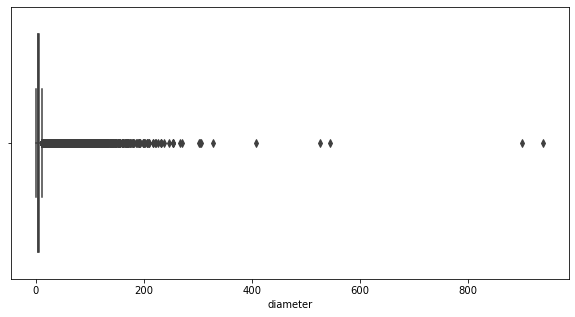

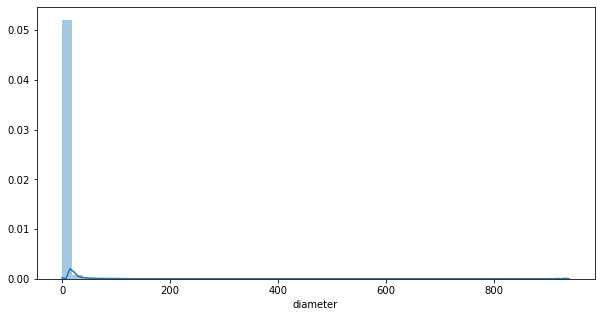

In [29]:
print(df['diameter'].describe())

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(x=df['diameter'])
plt.show()

# Distribution on rent 
plt.figure(figsize=(10,5))
sns.distplot(df['diameter']);
plt.show()

#### As we can see that the data is highly positive skewed . The difference between the 75th percentile and the maximum value is very large. However the outliers in this case are asteroids with high diameters which is  relevant  data  .

<a id="t3.2."></a>
## 3.2. Exploration through pairplot

<Figure size 1440x1440 with 0 Axes>

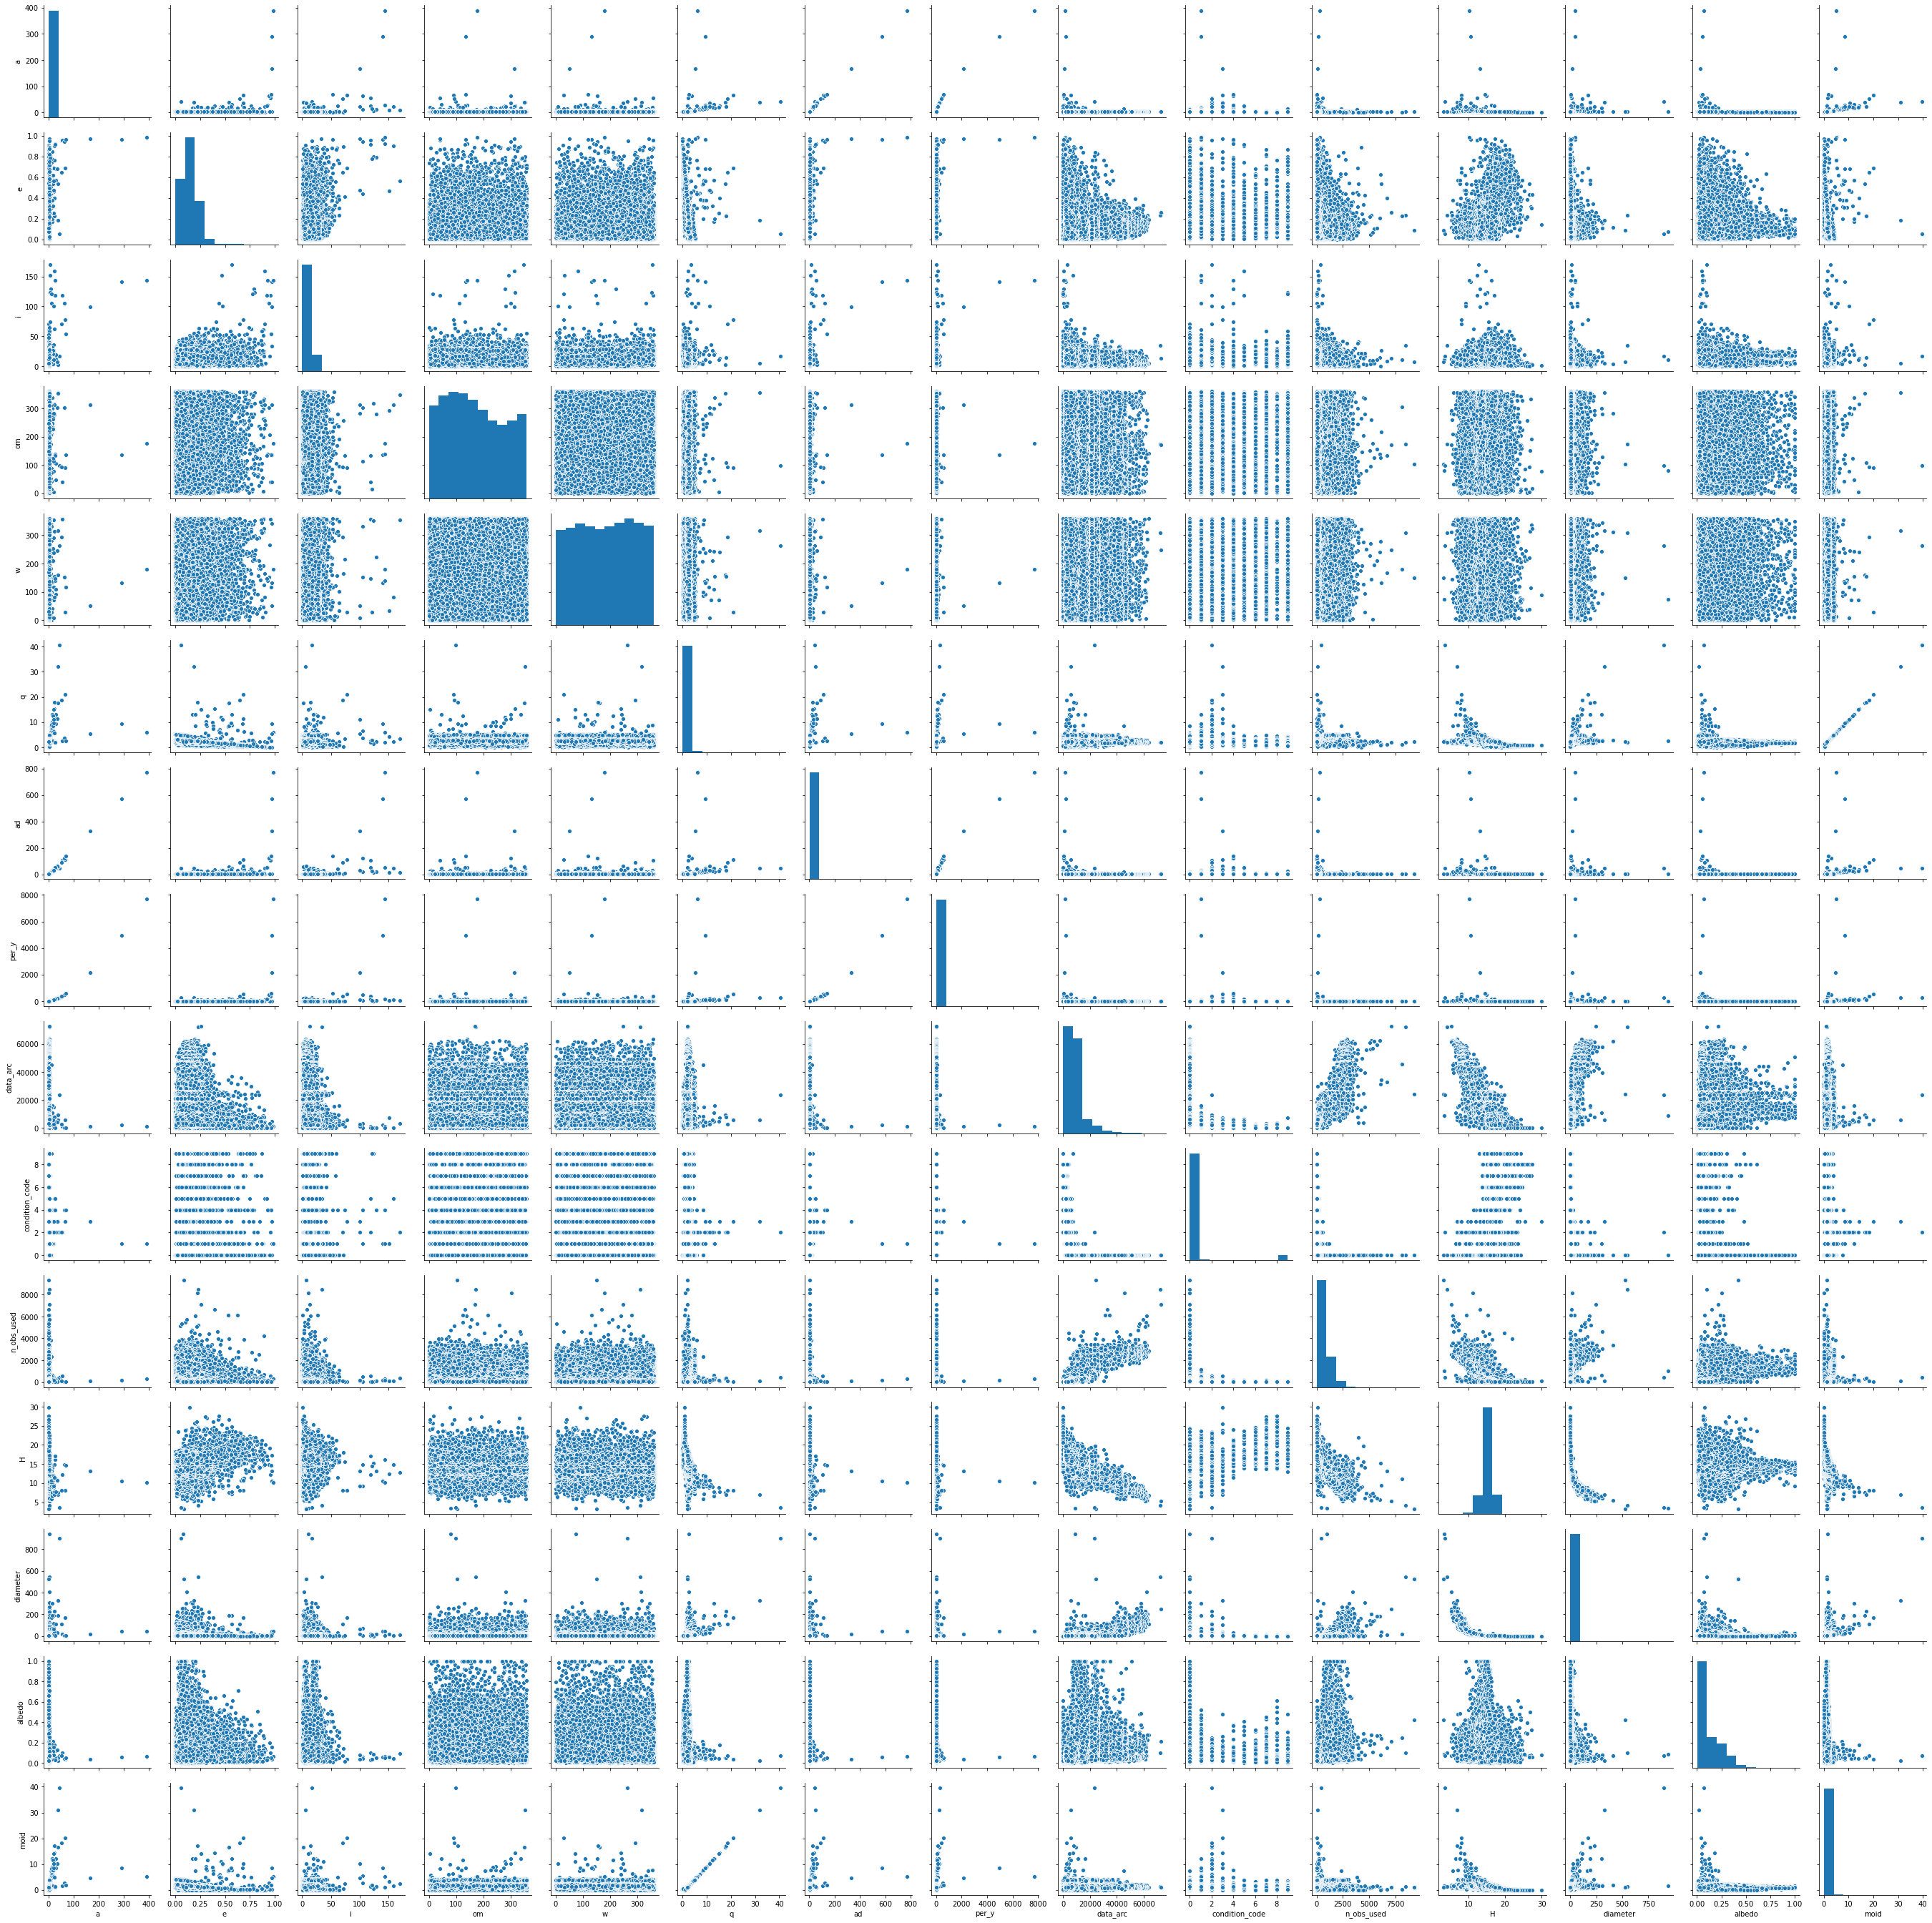

In [30]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

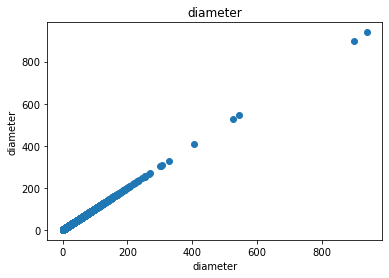

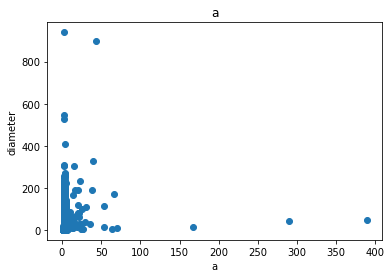

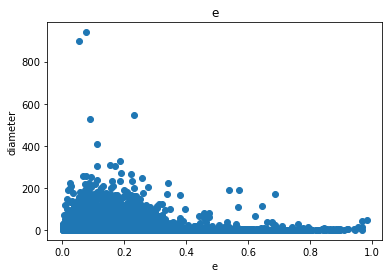

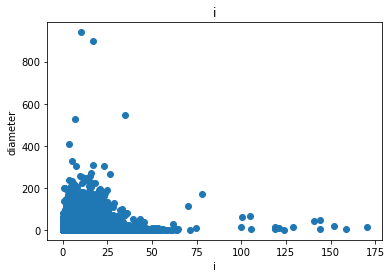

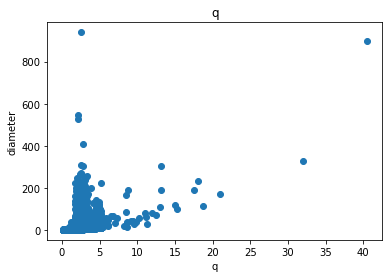

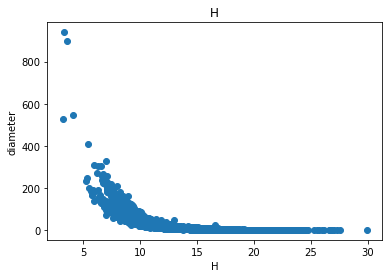

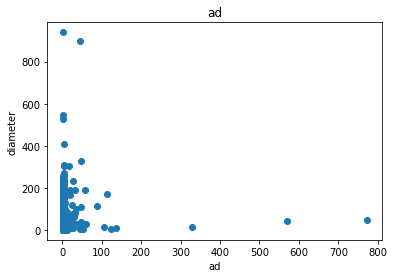

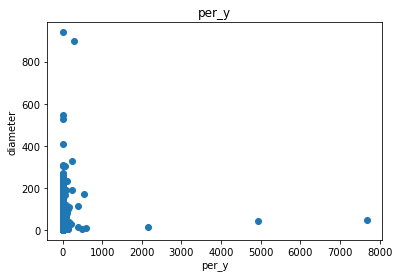

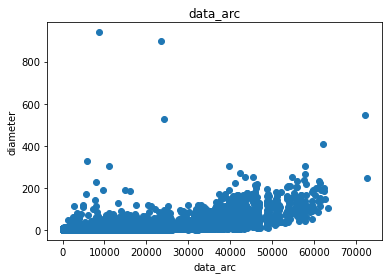

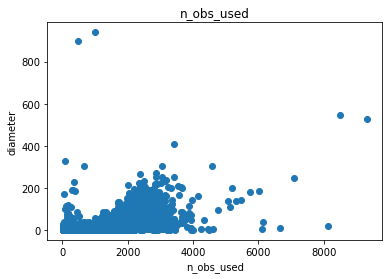

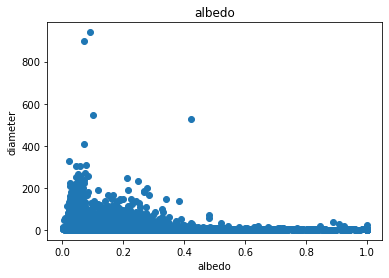

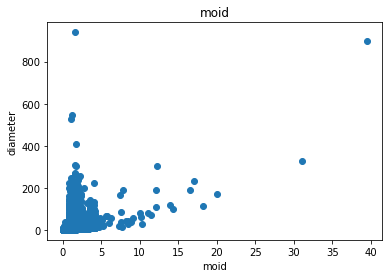

In [31]:
# before transformation scatterplots 
numeric_df=['diameter','a','e','i','q','H','ad','per_y','data_arc','n_obs_used','albedo','moid']

for feature in numeric_df:
    plt.scatter(df[feature],df['diameter'])
    plt.xlabel(feature)
    plt.ylabel('diameter')
    plt.title(feature)
    plt.show()

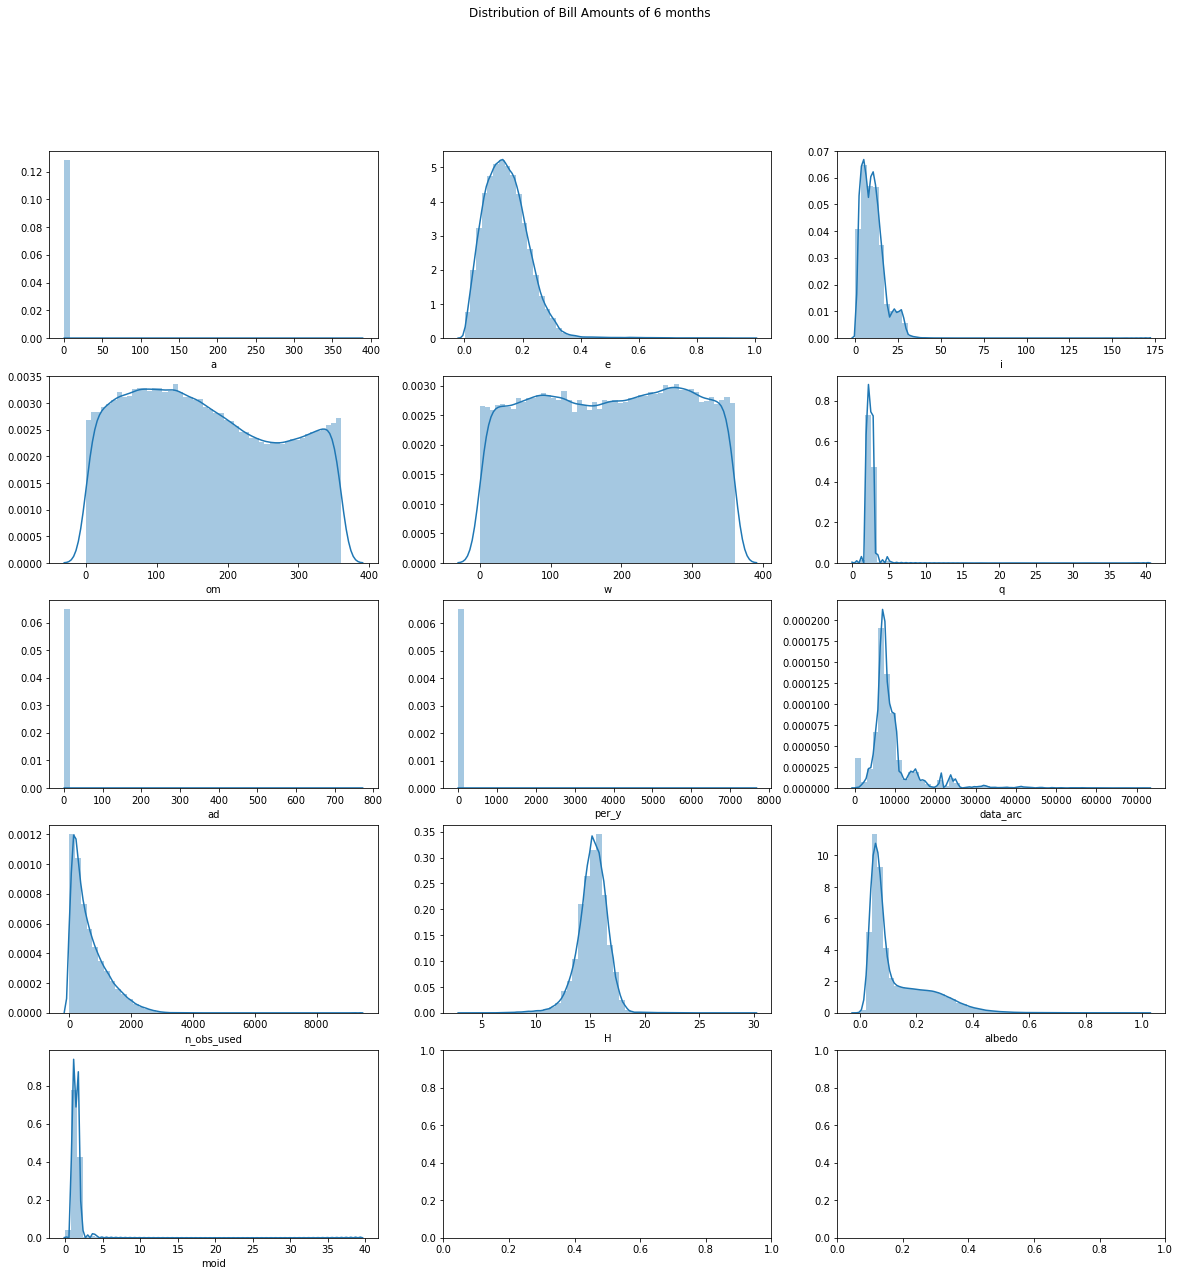

In [32]:
f, axes = plt.subplots(5, 3, figsize=(20, 20), facecolor='white')
f.suptitle('Distribution of Bill Amounts of 6 months')
ax1 = sns.distplot(df["a"], ax=axes[0,0])
ax2 = sns.distplot(df["e"], ax=axes[0,1])
ax3 = sns.distplot(df["i"], ax=axes[0,2])
ax4 = sns.distplot(df["om"], ax=axes[1,0])
ax5 = sns.distplot(df["w"], ax=axes[1,1])
ax6 = sns.distplot(df["q"], ax=axes[1,2])
ax7 = sns.distplot(df["ad"], ax=axes[2,0])
ax8 = sns.distplot(df["per_y"], ax=axes[2,1])
ax9 = sns.distplot(df["data_arc"], ax=axes[2,2])
ax10 = sns.distplot(df["n_obs_used"], ax=axes[3,0])
ax11 = sns.distplot(df["H"], ax=axes[3,1])
ax12 = sns.distplot(df["albedo"], ax=axes[3,2]);
ax13 = sns.distplot(df["moid"], ax=axes[4,0]);

In [33]:
columns=['diameter','a','e','i','om','w','q','ad','per_y','data_arc','n_obs_used','H','albedo','moid']
for col in columns:
    print('Skewness of %s: %f'%(col,df[col].skew()))

Skewness of diameter: 26.043024
Skewness of a: 179.547107
Skewness of e: 1.395735
Skewness of i: 1.635546
Skewness of om: 0.183755
Skewness of w: -0.028100
Skewness of q: 7.311342
Skewness of ad: 203.525845
Skewness of per_y: 254.302884
Skewness of data_arc: 2.697089
Skewness of n_obs_used: 1.372473
Skewness of H: -0.669907
Skewness of albedo: 1.709701
Skewness of moid: 7.597408


### Boxcox tranformation 

In [34]:
# import modules
import numpy as np
from scipy import stats
from sklearn.preprocessing import power_transform
col=['diameter','a','e','i','q','ad','per_y','data_arc','n_obs_used','albedo','moid']
for i in col:
    df[i], lvalue = stats.boxcox(df[i])

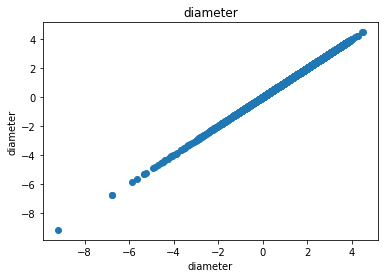

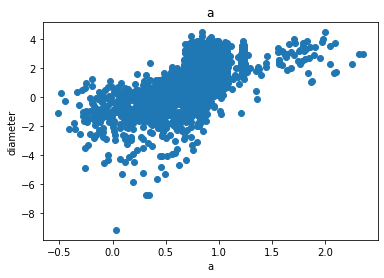

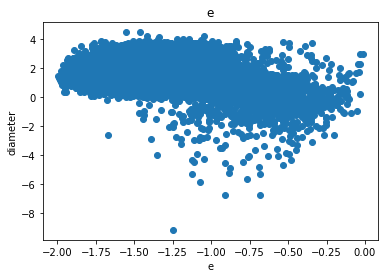

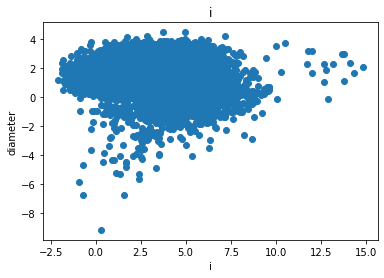

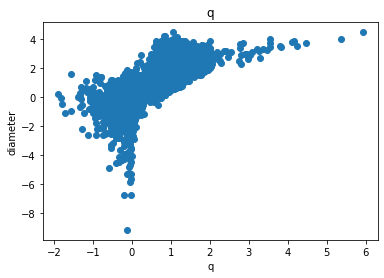

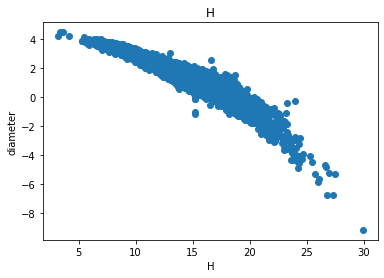

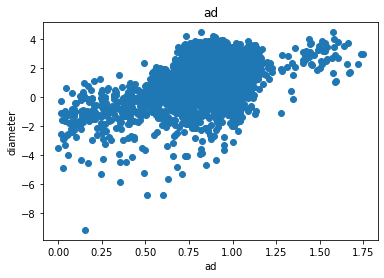

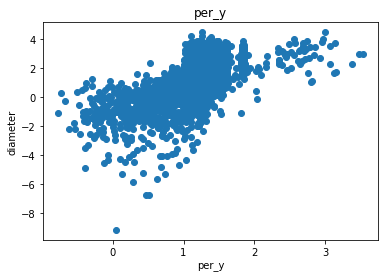

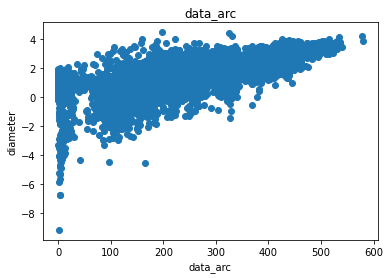

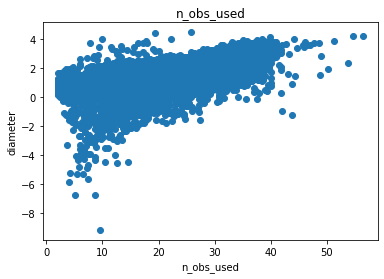

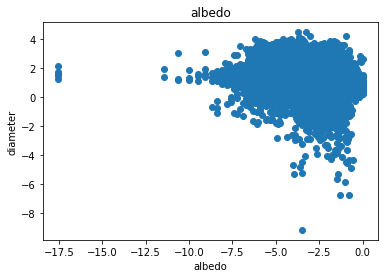

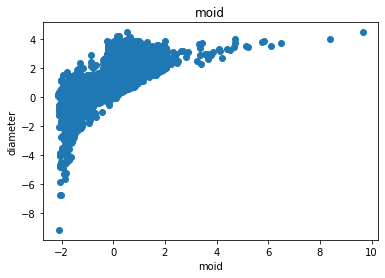

In [35]:
numeric_df=['diameter','a','e','i','q','H','ad','per_y','data_arc','n_obs_used','albedo','moid']

for feature in numeric_df:
    plt.scatter(df[feature],df['diameter'])
    plt.xlabel(feature)
    plt.ylabel('diameter')
    plt.title(feature)
    plt.show()

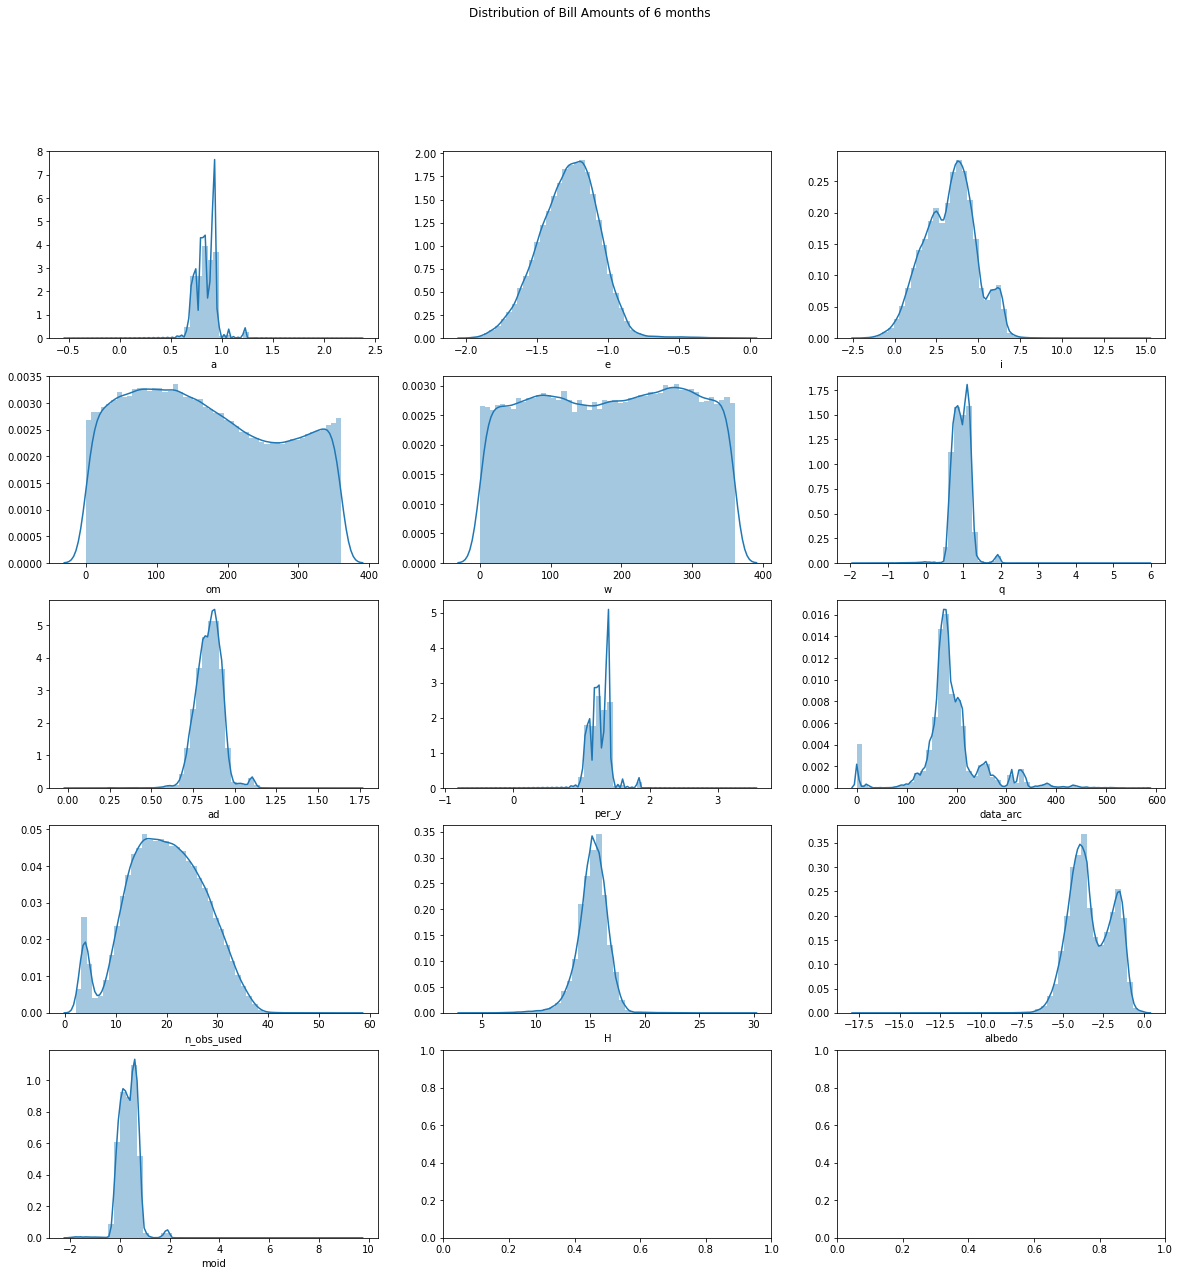

In [36]:
f, axes = plt.subplots(5, 3, figsize=(20, 20), facecolor='white')
f.suptitle('Distribution of Bill Amounts of 6 months')
ax1 = sns.distplot(df["a"], ax=axes[0,0])
ax2 = sns.distplot(df["e"], ax=axes[0,1])
ax3 = sns.distplot(df["i"], ax=axes[0,2])
ax4 = sns.distplot(df["om"], ax=axes[1,0])
ax5 = sns.distplot(df["w"], ax=axes[1,1])
ax6 = sns.distplot(df["q"], ax=axes[1,2])
ax7 = sns.distplot(df["ad"], ax=axes[2,0])
ax8 = sns.distplot(df["per_y"], ax=axes[2,1])
ax9 = sns.distplot(df["data_arc"], ax=axes[2,2])
ax10 = sns.distplot(df["n_obs_used"], ax=axes[3,0])
ax11 = sns.distplot(df["H"], ax=axes[3,1])
ax12 = sns.distplot(df["albedo"], ax=axes[3,2]);
ax13 = sns.distplot(df["moid"], ax=axes[4,0]);

In [37]:
columns=['diameter','a','e','i','om','w','q','ad','per_y','data_arc','n_obs_used','H','albedo','moid']
for col in columns:
    print('Skewness of %s: %f'%(col,df[col].skew()))

Skewness of diameter: -0.177950
Skewness of a: -0.258049
Skewness of e: 0.033915
Skewness of i: -0.022521
Skewness of om: 0.183755
Skewness of w: -0.028100
Skewness of q: 0.175137
Skewness of ad: -0.235445
Skewness of per_y: -0.258049
Skewness of data_arc: 0.137510
Skewness of n_obs_used: -0.069753
Skewness of H: -0.669907
Skewness of albedo: 0.037093
Skewness of moid: 0.476788


<a id="t3.19."></a>
## 3.19. Heatmap

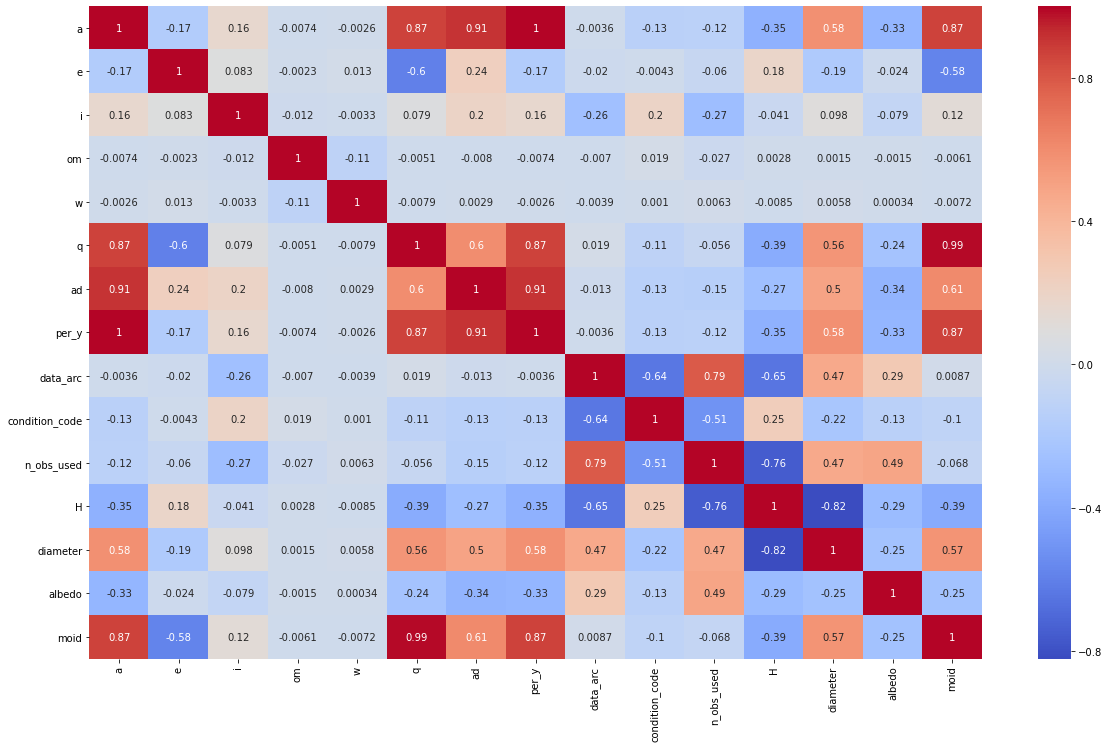

In [38]:
# Figure size
cor=df.corr()
plt.figure(figsize=(20,12))

# Heatmap
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()

<a id="t2.6."></a>
##  Get dummies

In [39]:
new_condition_code = pd.get_dummies(df.condition_code, drop_first = True,prefix='condition_code')
new_neo = pd.get_dummies(df.neo, drop_first = True,prefix='neo')
new_pha = pd.get_dummies(df.pha, drop_first = True,prefix='pha')
df1= pd.concat([df,new_condition_code,new_neo,new_pha], axis=1)
df1.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,condition_code_2,condition_code_3,condition_code_4,condition_code_5,condition_code_6,condition_code_7,condition_code_8,condition_code_9,neo_Y,pha_Y
0,0.843799,-1.464625,3.713068,80.305532,73.597694,1.052077,0.817198,1.265711,196.977478,0,...,0,0,0,0,0,0,0,0,0,0
1,0.844606,-1.047389,7.175998,173.080063,310.048857,0.830133,0.887937,1.266921,577.403867,0,...,0,0,0,0,0,0,0,0,0,0
2,0.818692,-0.992641,4.206153,169.852760,248.138626,0.743363,0.879546,1.228051,578.891807,0,...,0,0,0,0,0,0,0,0,0,0
3,0.732499,-1.419088,2.855547,103.810804,150.728541,0.840217,0.733665,1.098762,330.845384,0,...,0,0,0,0,0,0,0,0,0,0
4,0.793638,-1.134419,2.305834,141.576604,358.687608,0.800966,0.832623,1.190470,540.063843,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df1.drop(['condition_code','neo','pha',],axis=1,inplace=True)
df1.head(2)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,condition_code_2,condition_code_3,condition_code_4,condition_code_5,condition_code_6,condition_code_7,condition_code_8,condition_code_9,neo_Y,pha_Y
0,0.843799,-1.464625,3.713068,80.305532,73.597694,1.052077,0.817198,1.265711,196.977478,25.798618,...,0,0,0,0,0,0,0,0,0,0
1,0.844606,-1.047389,7.175998,173.080063,310.048857,0.830133,0.887937,1.266921,577.403867,54.570679,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df1.to_csv('asteroid_cohepowert.csv') 

In [42]:
df2=pd.read_csv('asteroid_cohepowert.csv', )
df2.drop(['Unnamed: 0'], axis=1,inplace=True)
df2.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,condition_code_2,condition_code_3,condition_code_4,condition_code_5,condition_code_6,condition_code_7,condition_code_8,condition_code_9,neo_Y,pha_Y
0,0.843799,-1.464625,3.713068,80.305532,73.597694,1.052077,0.817198,1.265711,196.977478,25.798618,...,0,0,0,0,0,0,0,0,0,0
1,0.844606,-1.047389,7.175998,173.080063,310.048857,0.830133,0.887937,1.266921,577.403867,54.570679,...,0,0,0,0,0,0,0,0,0,0
2,0.818692,-0.992641,4.206153,169.852760,248.138626,0.743363,0.879546,1.228051,578.891807,51.340880,...,0,0,0,0,0,0,0,0,0,0
3,0.732499,-1.419088,2.855547,103.810804,150.728541,0.840217,0.733665,1.098762,330.845384,56.346923,...,0,0,0,0,0,0,0,0,0,0
4,0.793638,-1.134419,2.305834,141.576604,358.687608,0.800966,0.832623,1.190470,540.063843,37.469962,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X=df2.drop(['diameter'],axis=1)
y=df2['diameter']

<a id="t4."></a>
# 4. Modelling

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="t4.1."></a>
# 4.1. Linear Regression

In [45]:
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression

# Fitting Multiple Linear Regression to the Training set
Multiple_regressor = LinearRegression()
Multiple_regressor.fit(X_train, y_train)

#prediciting the values of both train and test using the model 
y_train_pred = Multiple_regressor.predict(X_train)
y_test_pred = Multiple_regressor.predict(X_test)


# training and testing RMSE
Train_RMSE_linearreg = np.sqrt(mean_squared_error(y_train , y_train_pred))
Test_RMSE_linearreg = np.sqrt(mean_squared_error(y_test , y_test_pred))

# R-square score
r2_linearreg = r2_score(y_test , y_test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(r2_linearreg))
print()
print('Training RMSE is {}'.format(Train_RMSE_linearreg))
print('Testing RMSE is {}'.format(Test_RMSE_linearreg))

R_SQAURE_score is 0.9471501087937523

Training RMSE is 0.11916153103688445
Testing RMSE is 0.12017709394848865


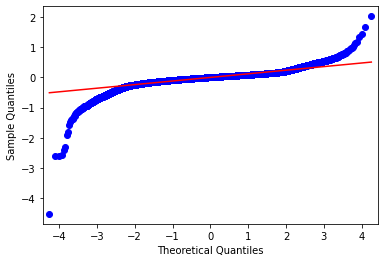

In [46]:
#Create a QQ Plot and interpret it?

import numpy as np 
import statsmodels.api as sm 
import pylab as py 
errors= y_train - y_train_pred     
sm.qqplot(errors,line='s') 
py.show()


C:\Users\gayat\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


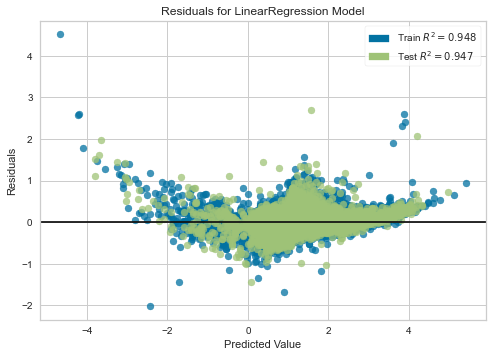

In [47]:
# Test for Redisuals 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(Multiple_regressor, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

<a id="t4.2."></a>
# 4.2. Ridge Regression

R_SQAURE_score is 0.9464457573652589

Training RMSE is 0.1200843183005997
Testing RMSE is 0.12097526721821418


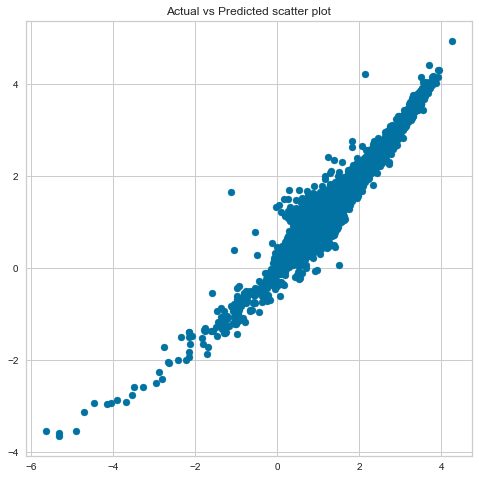

In [48]:

from sklearn.linear_model import Ridge
Ridge_regressor = Ridge(alpha=0.5)
Ridge_regressor.fit(X_train , y_train)

#prediciting the values of both train and test using the model 
y_train_pred = Ridge_regressor.predict(X_train)
y_test_pred = Ridge_regressor.predict(X_test)

# training and testing RMSE
Train_RMSE_ridgereg = np.sqrt(mean_squared_error(y_train , y_train_pred))
Test_RMSE_ridgereg = np.sqrt(mean_squared_error(y_test , y_test_pred))

# R-square score
r2_ridgereg = r2_score(y_test , y_test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(r2_ridgereg))
print()
print('Training RMSE is {}'.format(Train_RMSE_ridgereg))
print('Testing RMSE is {}'.format(Test_RMSE_ridgereg))

# visualing the actual against predicted values
plt.figure(figsize=(8,8))
plt.title('Actual vs Predicted scatter plot')
plt.scatter(y_test, y_test_pred)
plt.show()

<a id="t4.3."></a>
# 4.3. Lasso Regression 

In [49]:
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error

# training the model
Lasso_regressor = Lasso(alpha=0.05)
Lasso_regressor.fit(X_train , y_train)

#prediciting the values of both train and test using the model 
y_train_pred = Lasso_regressor.predict(X_train)
y_test_pred = Lasso_regressor.predict(X_test)


# training and testing RMSE
Train_RMSE_lassoreg = np.sqrt(mean_squared_error(y_train , y_train_pred))
Test_RMSE_lassoreg = np.sqrt(mean_squared_error(y_test , y_test_pred))

# R-square score
r2_lassoreg = r2_score(y_test , y_test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(r2_lassoreg))
print()
print('Training RMSE is {}'.format(Train_RMSE_lassoreg))
print('Testing RMSE is {}'.format(Test_RMSE_lassoreg))

R_SQAURE_score is -0.0001950267292396557

Training RMSE is 0.5212066142097918
Testing RMSE is 0.5228077231194418


<a id="t4.4."></a>
# 4.4. ElasticNet Regression

In [50]:
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error

# training the model
ElasticNet_regressor = ElasticNet(alpha=0.05)
ElasticNet_regressor.fit(X_train , y_train)

#prediciting the values of both train and test using the model 
y_train_pred = ElasticNet_regressor.predict(X_train)
y_test_pred = ElasticNet_regressor.predict(X_test)


# training and testing RMSE
Train_RMSE_elasticnetreg = np.sqrt(mean_squared_error(y_train , y_train_pred))
Test_RMSE_elasticnetreg = np.sqrt(mean_squared_error(y_test , y_test_pred))

# R-square score
r2_elasticnetreg = r2_score(y_test , y_test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(r2_elasticnetreg))
print()
print('Training RMSE is {}'.format(Train_RMSE_elasticnetreg))
print('Testing RMSE is {}'.format(Test_RMSE_elasticnetreg))

R_SQAURE_score is 0.05242290464046517

Training RMSE is 0.5071683801118939
Testing RMSE is 0.5088700916535587


<a id="t4.5."></a>
# 4.5. Support vector Regression RBF kernel

R_SQAURE_score is 0.9590397715297703

Training RMSE is 0.10315271360002894
Testing RMSE is 0.10579882253483576


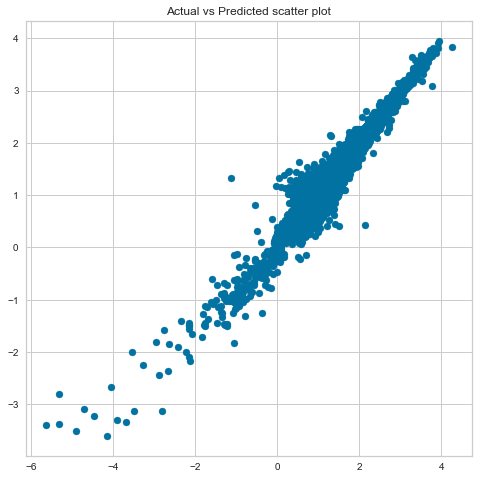

In [51]:
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error

# training the model 
SupportVector_regressor =SVR()  
SupportVector_regressor.fit(X_train, y_train) 

#prediciting the values of both train and test using the model 
y_train_pred = SupportVector_regressor.predict(X_train)
y_test_pred = SupportVector_regressor.predict(X_test)

# training and testing RMSE
Train_RMSE_svmrbf = np.sqrt(mean_squared_error(y_train , y_train_pred))
Test_RMSE_svmrbf = np.sqrt(mean_squared_error(y_test , y_test_pred))

# R-square score
r2_svmrbf = r2_score(y_test , y_test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(r2_svmrbf))
print()
print('Training RMSE is {}'.format(Train_RMSE_svmrbf))
print('Testing RMSE is {}'.format(Test_RMSE_svmrbf))

# visualing the actual against predicted values
plt.figure(figsize=(8,8))
plt.title('Actual vs Predicted scatter plot')
plt.scatter(y_test, y_test_pred)
plt.show()

<a id="t4.6."></a>
# 4.6. Support Vector Regressor Linear Kernel 

R_SQAURE_score is 0.945817606426477

Training RMSE is 0.12070155306410467
Testing RMSE is 0.12168267332410697


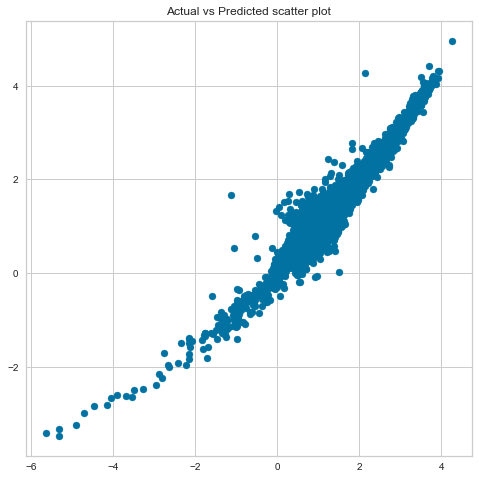

In [52]:
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error

# training the model 
SupportVector_regressor =SVR(kernel='linear')  
SupportVector_regressor.fit(X_train, y_train) 

#prediciting the values of both train and test using the model 
y_train_pred = SupportVector_regressor.predict(X_train)
y_test_pred = SupportVector_regressor.predict(X_test)

# training and testing RMSE
Train_RMSE_svmlinear = np.sqrt(mean_squared_error(y_train , y_train_pred))
Test_RMSE_svmlinear = np.sqrt(mean_squared_error(y_test , y_test_pred))

# R-square score
r2_svmlinear = r2_score(y_test , y_test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(r2_svmlinear))
print()
print('Training RMSE is {}'.format(Train_RMSE_svmlinear))
print('Testing RMSE is {}'.format(Test_RMSE_svmlinear))

# visualing the actual against predicted values
plt.figure(figsize=(8,8))
plt.title('Actual vs Predicted scatter plot')
plt.scatter(y_test, y_test_pred)
plt.show()

<a id="t4.7."></a>
# 4.7. DecisionTree Regression 

R_SQAURE_score is 0.9385234494162784

Training RMSE is 4.742569474058928e-05
Testing RMSE is 0.1296147405537767


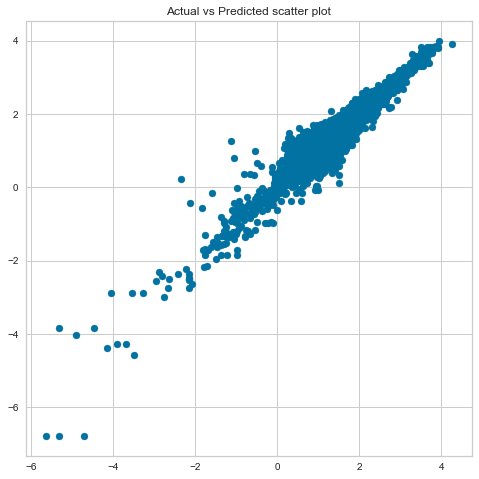

In [53]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error

# Training the model
DecisionTree_regressor = DecisionTreeRegressor(random_state = 0)  
DecisionTree_regressor.fit(X_train, y_train) 

#prediciting the values of both train and test using the model 
y_train_pred = DecisionTree_regressor.predict(X_train)
y_test_pred = DecisionTree_regressor.predict(X_test)


# training and testing RMSE
Train_RMSE_dtreg = np.sqrt(mean_squared_error(y_train , y_train_pred))
Test_RMSE_dtreg = np.sqrt(mean_squared_error(y_test , y_test_pred))

# R-square score
r2_dtreg = r2_score(y_test , y_test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(r2_dtreg))
print()
print('Training RMSE is {}'.format(Train_RMSE_dtreg))
print('Testing RMSE is {}'.format(Test_RMSE_dtreg))

# visualing the actual against predicted values
plt.figure(figsize=(8,8))
plt.title('Actual vs Predicted scatter plot')
plt.scatter(y_test, y_test_pred)
plt.show()

<a id="t4.8."></a>
# 4.8. RandomForest Regression

R_SQAURE_score is 0.9643704712856712

Training RMSE is 0.04623332567708778
Testing RMSE is 0.09867444401822179


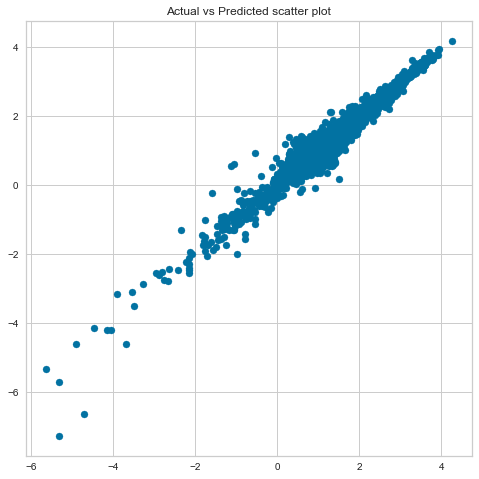

In [54]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error 

# Training the model
RandomForest_regressor = RandomForestRegressor(n_estimators=5)  
RandomForest_regressor.fit(X_train, y_train) 

#prediciting the values of both train and test using the model 
y_train_pred = RandomForest_regressor.predict(X_train)
y_test_pred = RandomForest_regressor.predict(X_test)

# training and testing RMSE
Train_RMSE_rfreg = np.sqrt(mean_squared_error(y_train , y_train_pred))
Test_RMSE_rfreg = np.sqrt(mean_squared_error(y_test , y_test_pred))

# R-square score
r2_rfreg = r2_score(y_test , y_test_pred)

# Displaying the value 
print('R_SQAURE_score is {}'.format(r2_rfreg))
print()
print('Training RMSE is {}'.format(Train_RMSE_rfreg))
print('Testing RMSE is {}'.format(Test_RMSE_rfreg))

# visualing the actual against predicted values
plt.figure(figsize=(8,8))
plt.title('Actual vs Predicted scatter plot')
plt.scatter(y_test, y_test_pred)
plt.show()

<a id="t4.11."></a>
# 4.11. GRADIENT BOOSTING(GBM)

R_SQAURE_score is 0.9631647264842165
Training RMSE is 0.09728443574713559
Testing RMSE is 0.10033018167099352



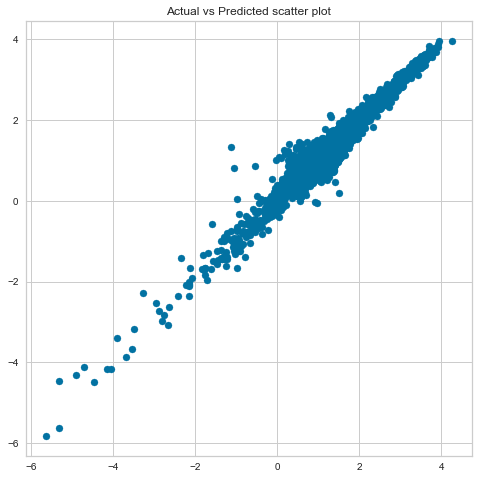

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)


#prediciting the values of both train and test using the model 
y_train_pred = model.predict(X_train)
y_test_pred =model.predict(X_test)

# training and testing RMSE
Train_RMSE_grboost = np.sqrt(mean_squared_error(y_train , y_train_pred))
Test_RMSE_grboost = np.sqrt(mean_squared_error(y_test , y_test_pred))

# R-square score
r2_grboost = r2_score(y_test,y_test_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_test_pred))


print('R_SQAURE_score is {}'.format(r2_grboost))
print('Training RMSE is {}'.format(Train_RMSE_grboost))
print('Testing RMSE is {}'.format(Test_RMSE_grboost))
print()


# visualing the actual against predicted values
plt.figure(figsize=(8,8))
plt.title('Actual vs Predicted scatter plot')
plt.scatter(y_test, y_test_pred)
plt.show()

<a id="t4.12."></a>
# 4.12. XGBOOST

R_SQAURE_score is 0.969984849096471
Training RMSE is 0.07816029914382192
Testing RMSE is 0.09056698594046422



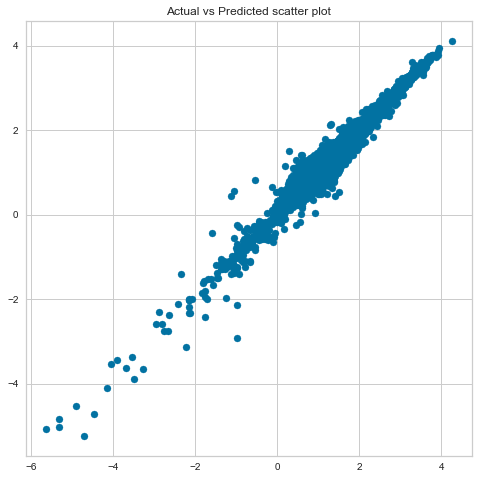

In [56]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

#prediciting the values of both train and test using the model 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# training and testing RMSE
Train_RMSE_xgboost = np.sqrt(mean_squared_error(y_train , y_train_pred))
Test_RMSE_xgboost = np.sqrt(mean_squared_error(y_test , y_test_pred))

# R-square score
r2_xgboost = r2_score(y_test,y_test_pred)


print('R_SQAURE_score is {}'.format(r2_xgboost))
print('Training RMSE is {}'.format(Train_RMSE_xgboost))
print('Testing RMSE is {}'.format(Test_RMSE_xgboost))
print()

# visualing the actual against predicted values
plt.figure(figsize=(8,8))
plt.title('Actual vs Predicted scatter plot')
plt.scatter(y_test, y_test_pred)
plt.show()

In [57]:
results = pd.DataFrame({ 'Model' : ['Linear Regression','Ridge Regressor','Lasso Regressor','Elasticnet Regressor','SVM RBF','SVM Linear','Decision Tree','Random Forest','Gradient Boosting','XGBoost'],
                        'R2' : [r2_linearreg,r2_ridgereg,r2_lassoreg,r2_elasticnetreg,r2_svmrbf,r2_svmlinear,r2_dtreg,r2_rfreg,r2_grboost,r2_xgboost],
                        'Train RMSE' : [Train_RMSE_linearreg,Train_RMSE_ridgereg,Train_RMSE_lassoreg,Train_RMSE_elasticnetreg,Train_RMSE_svmrbf,Train_RMSE_svmlinear,Train_RMSE_dtreg,Train_RMSE_rfreg,Train_RMSE_grboost,Train_RMSE_xgboost],
                        'Test RMSE' : [Test_RMSE_linearreg,Test_RMSE_ridgereg,Test_RMSE_lassoreg,Test_RMSE_elasticnetreg,Test_RMSE_svmrbf,Test_RMSE_svmlinear,Test_RMSE_dtreg,Test_RMSE_rfreg,Test_RMSE_grboost,Test_RMSE_xgboost]})

In [58]:
results

,Model,R2,Train RMSE,Test RMSE
0,Linear Regression,0.947150,0.119162,0.120177
1,Ridge Regressor,0.946446,0.120084,0.120975
2,Lasso Regressor,-0.000195,0.521207,0.522808
3,Elasticnet Regressor,0.052423,0.507168,0.508870
4,SVM RBF,0.959040,0.103153,0.105799
5,SVM Linear,0.945818,0.120702,0.121683
6,Decision Tree,0.938523,0.000047,0.129615
7,Random Forest,0.964370,0.046233,0.098674
8,Gradient Boosting,0.963165,0.097284,0.100330
9,XGBoost,0.969985,0.078160,0.090567


In [59]:
results.to_csv('Results.csv')

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt

result_df  = pd.read_csv('Results.csv')
result_df.drop(['Unnamed: 0'] , axis = 1 , inplace = True)
result_df.set_index('Model' , inplace = True )
result_df

,R2,Train RMSE,Test RMSE
Model,,,
Linear Regression,0.947150,0.119162,0.120177
Ridge Regressor,0.946446,0.120084,0.120975
Lasso Regressor,-0.000195,0.521207,0.522808
Elasticnet Regressor,0.052423,0.507168,0.508870
SVM RBF,0.959040,0.103153,0.105799
SVM Linear,0.945818,0.120702,0.121683
Decision Tree,0.938523,0.000047,0.129615
Random Forest,0.964370,0.046233,0.098674
Gradient Boosting,0.963165,0.097284,0.100330


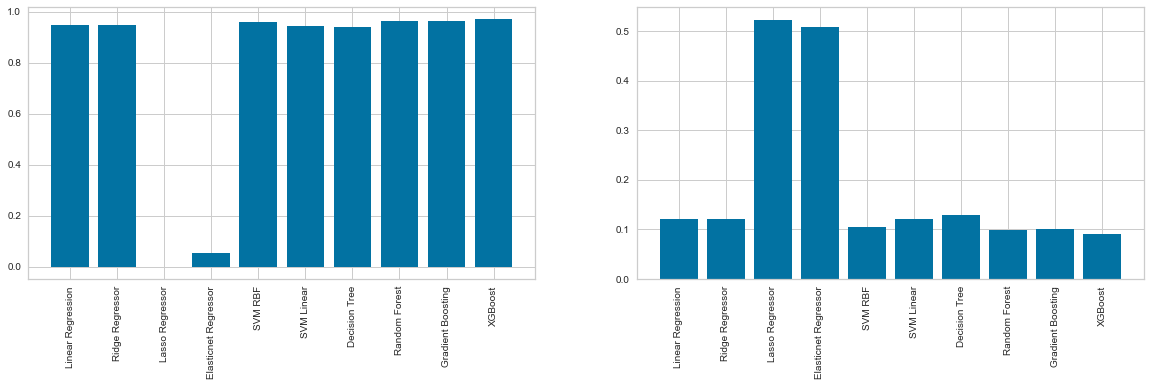

In [61]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (20,5))
ax1.bar(result_df.index , result_df['R2'])
ax2.bar(result_df.index , result_df['Test RMSE'])
ax1.set_xticklabels(result_df.index, rotation=90)
ax2.set_xticklabels(result_df.index, rotation=90)
plt.show()

In [63]:
highest_r2 = result_df['R2'].sort_values()
lowest_test_rmse = result_df['Test RMSE'].sort_values()
print(highest_r2)
print()
print(lowest_test_rmse)

Model
Lasso Regressor        -0.000195
Elasticnet Regressor    0.052423
Decision Tree           0.938523
SVM Linear              0.945818
Ridge Regressor         0.946446
Linear Regression       0.947150
SVM RBF                 0.959040
Gradient Boosting       0.963165
Random Forest           0.964370
XGBoost                 0.969985
Name: R2, dtype: float64

Model
XGBoost                 0.090567
Random Forest           0.098674
Gradient Boosting       0.100330
SVM RBF                 0.105799
Linear Regression       0.120177
Ridge Regressor         0.120975
SVM Linear              0.121683
Decision Tree           0.129615
Elasticnet Regressor    0.508870
Lasso Regressor         0.522808
Name: Test RMSE, dtype: float64


In [66]:
result_df['Test RMSE'] - result_df['Train RMSE']


Model
Linear Regression       0.001016
Ridge Regressor         0.000891
Lasso Regressor         0.001601
Elasticnet Regressor    0.001702
SVM RBF                 0.002646
SVM Linear              0.000981
Decision Tree           0.129567
Random Forest           0.052441
Gradient Boosting       0.003046
XGBoost                 0.012407
dtype: float64